In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


Data Collection and Analysis

In [5]:
#loading data from dataset
titanic_dataset=pd.read_csv('data/train.csv')

In [6]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_dataset.shape

(891, 12)

In [8]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Categorical features:
- Pclass
- Sex
- embarked

In [9]:
titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling missing values

In [11]:
# cabin column has a lot of null values, so it's best to remove it
titanic_dataset.drop(columns='Cabin', axis=1, inplace=True)

In [12]:
# Age has some null values, replace null values with the mean
titanic_dataset['Age'].fillna(titanic_dataset['Age'].mean(), inplace=True)

In [15]:
print(titanic_dataset['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [17]:
# embarked has only 2 null values, replace null with most repeated category
titanic_dataset['Embarked'].fillna(titanic_dataset['Embarked'].mode()[0], inplace=True)

In [18]:
titanic_dataset.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis and Visualization


In [10]:
titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


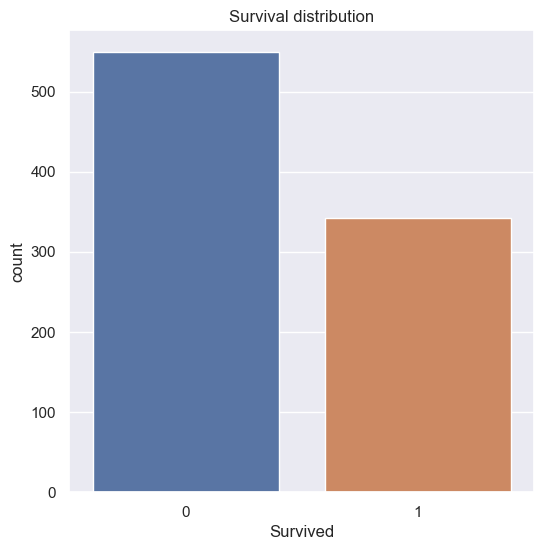

In [23]:
# finding number of people who survived and not survived
plt.figure(figsize = (6,6))
sns.countplot(x = 'Survived', data = titanic_dataset)
plt.title('Survival distribution')
plt.show()

In [24]:
titanic_dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Age distribution')

<Figure size 600x600 with 0 Axes>

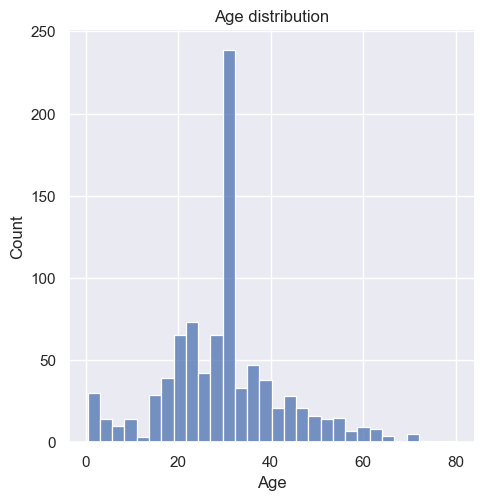

In [13]:
# age distribution
sns.set()
plt.figure(figsize = (6,6))
sns.displot(titanic_dataset['Age'])
plt.title('Age distribution')

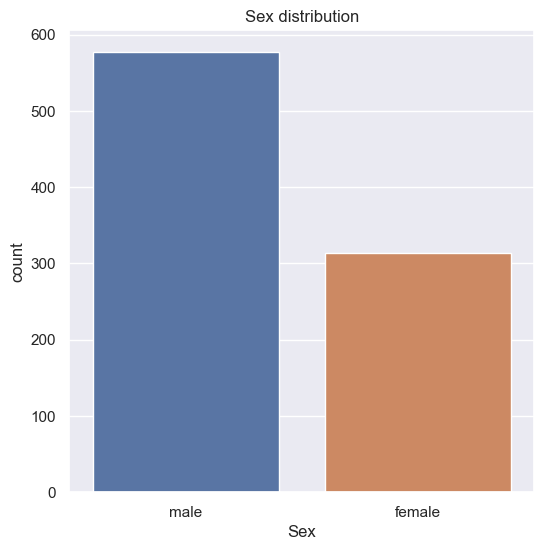

In [20]:
# gender column
plt.figure(figsize = (6,6))
sns.countplot(x = 'Sex', data = titanic_dataset)
plt.title('Sex distribution')
plt.show()

In [22]:
titanic_dataset['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

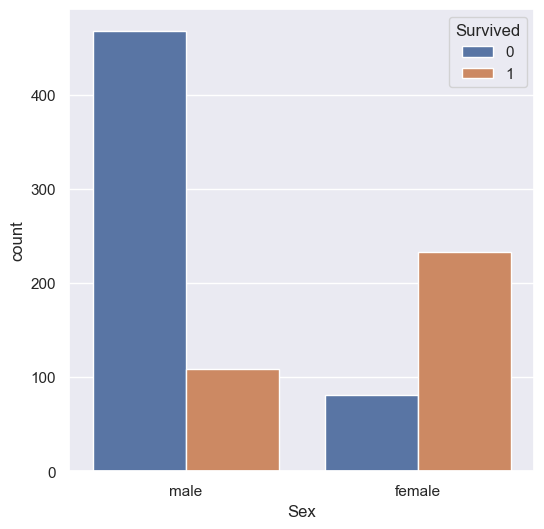

In [25]:
# survivors per gender
plt.figure(figsize = (6,6))
sns.countplot(x = 'Sex', hue = 'Survived', data = titanic_dataset)
plt.show()

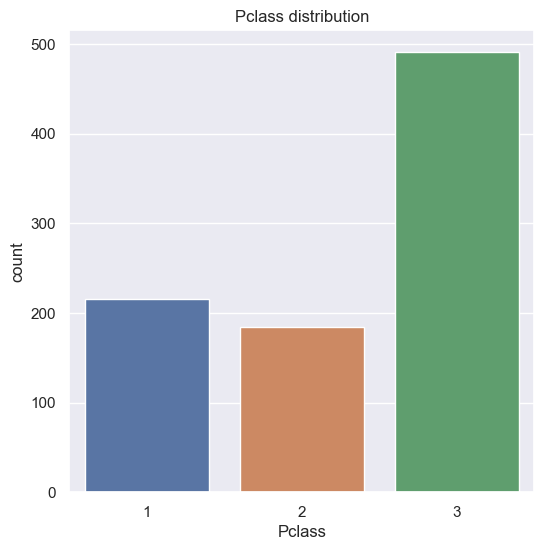

In [30]:
# Pclass column
plt.figure(figsize = (6,6))
sns.countplot(x = 'Pclass', data = titanic_dataset)
plt.title('Pclass distribution')
plt.show()

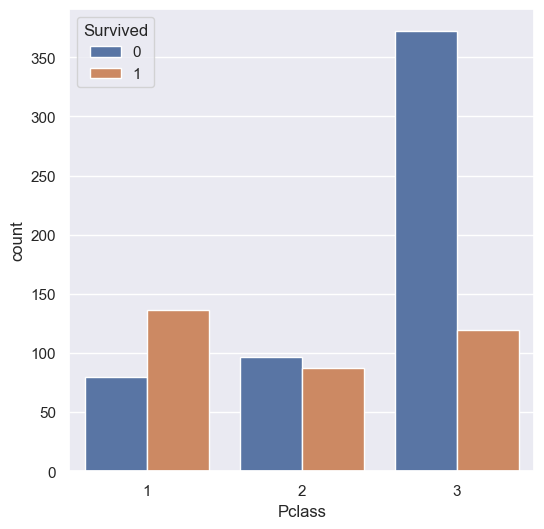

In [31]:
# Survivors per Pclass column
plt.figure(figsize = (6,6))
sns.countplot(x = 'Pclass',hue = 'Survived', data = titanic_dataset)
plt.show()

In [32]:
titanic_dataset['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Encoding Categorical features

In [34]:
#encoding sex Column
titanic_dataset.replace({'Sex':{'male': 0, 'female': 1}}, inplace = True)

In [33]:
titanic_dataset['Embarked'].value_counts()


S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [35]:
#encoding embarked Column
titanic_dataset.replace({'Embarked':{'S': 0, 'C': 1, 'Q': 2}}, inplace = True)

In [36]:
titanic_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1


Splitting features and Target

In [75]:
X = titanic_dataset.drop(columns=['Name', 'Ticket','Survived'], axis=1)
Y = titanic_dataset['Survived']

In [76]:
print(X)

     PassengerId  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0              1       3    0  22.000000      1      0   7.2500         0
1              2       1    1  38.000000      1      0  71.2833         1
2              3       3    1  26.000000      0      0   7.9250         0
3              4       1    1  35.000000      1      0  53.1000         0
4              5       3    0  35.000000      0      0   8.0500         0
..           ...     ...  ...        ...    ...    ...      ...       ...
886          887       2    0  27.000000      0      0  13.0000         0
887          888       1    1  19.000000      0      0  30.0000         0
888          889       3    1  29.699118      1      2  23.4500         0
889          890       1    0  26.000000      0      0  30.0000         1
890          891       3    0  32.000000      0      0   7.7500         2

[891 rows x 8 columns]


In [77]:
print(Y)


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Split data into training data and testing data

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [79]:
print(X.shape, X_train.shape, X_test.shape)

(891, 8) (712, 8) (179, 8)


Model Training : Logistic Regression

In [80]:
# loading the linear regression model
model = LogisticRegression( max_iter=200)

In [81]:
model.fit(X_train, Y_train)

C:\Users\malak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

Model evaluation

Accuracy on training data

In [82]:
training_data_prediction  = model.predict(X_train)

In [83]:
print(training_data_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 1 1 1 1 0 

In [84]:
training_data_Accuracy = accuracy_score(Y_train, training_data_prediction)
print("Accuracy Score of training data : ", training_data_Accuracy)

Accuracy Score of training data :  0.8117977528089888


In [85]:
test_data_prediction  = model.predict(X_test)

In [86]:
test_data_Accuracy = accuracy_score(Y_test, test_data_prediction)
print("Accuracy Score of testing data : ", test_data_Accuracy)

Accuracy Score of testing data :  0.770949720670391


In [90]:
test_df = pd.read_csv('data/test.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [91]:
def preprocess_data(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Fare'].fillna(df['Fare'].mean(), inplace=True)
    df['Embarked'].fillna(titanic_dataset['Embarked'].mode()[0], inplace=True)
    df.replace({'Sex':{'male': 0, 'female': 1}}, inplace = True)
    df.replace({'Embarked':{'S': 0, 'C': 1, 'Q': 2}}, inplace = True)
    df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
    return df

test_df = preprocess_data(test_df)

In [114]:

predictions = pd.DataFrame(model.predict(test_df))
predictions.columns = ['Survived']
predictions

,Survived
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [115]:
extracted_col = test_df['PassengerId']
predictions.insert(0,"PassengerId", extracted_col)
predictions


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [116]:
predictions.to_csv('submission.csv', index=False)
